
**Semana 7: Data Analysis with Python (IBM) Módulo 4**

**Nombre: Alexis Hernández Martínez**

**Matrícula: A01016308**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Jobish Vallikavungal Devassia**

**Fecha: Miércoles 26 Octubre 2022**


**Parte 1: Notebooks del Módulo 4**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
#Cargamos el archivo y lo guardamos en un DataFrame

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
# Creamos el objeto Regresión Lineal y ponemos en las variables X y Y, las columnas que queremos relacionar 
# como entrada y salida

lm = LinearRegression()

X = df[['highway-mpg']]
Y = df['price']


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [10]:
# Entrenamos el modelo y sacamos las predicciones, los primeros 5 valores

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [15]:
# Al ser una regresión lineal del formato y= ax + b, se saca el valor de los coeficientes

print(lm.intercept_)
print(lm.coef_)

print("La ecuación quedaría como y = ",lm.coef_,"x +",lm.intercept_)

38423.305858157415
[-821.73337832]
La ecuación quedaría como y =  [-821.73337832] x + 38423.305858157415


In [16]:
# Ahora, se hace el ejercicio de regresión múltiple linear, con varias variables de entrada, en este caso 4

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [17]:
# Nuevamente entrenamos el modelo 

lm.fit(Z, df['price'])

LinearRegression()

In [18]:
# Obtenemos los coeficientes, lm.coef traerá los 4 coeficientes de x1,x2,x3 y x4

print(lm.intercept_)
print(lm.coef_)

-15806.624626329245
[53.49574423  4.70770099 81.53026382 36.05748882]


(0.0, 48165.14013331293)

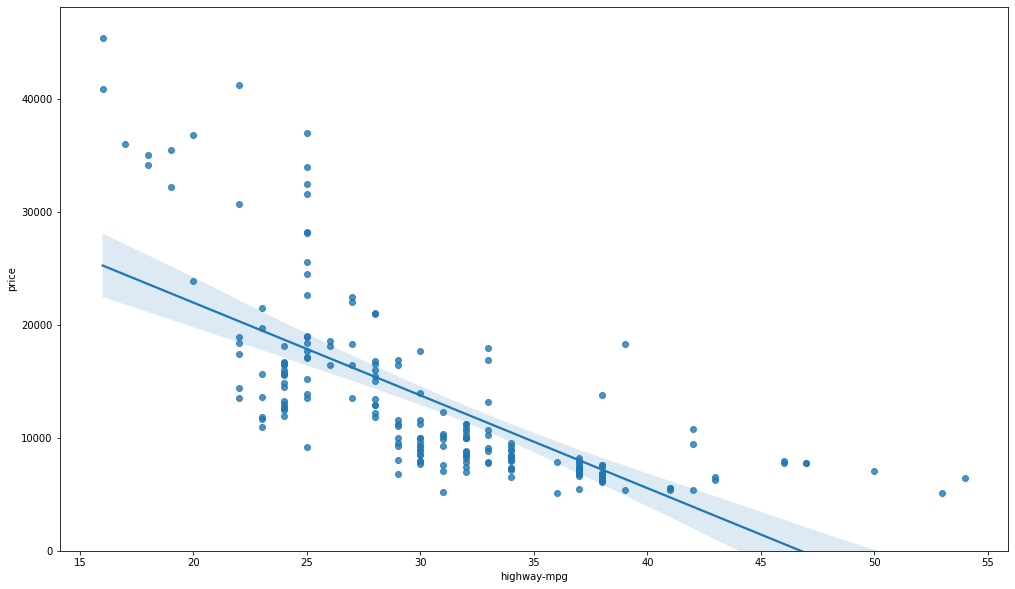

In [21]:
# Pasamos a la creación de un Regression Plot, tratando de predecir el precio a partir de highway-mpg

width = 17
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

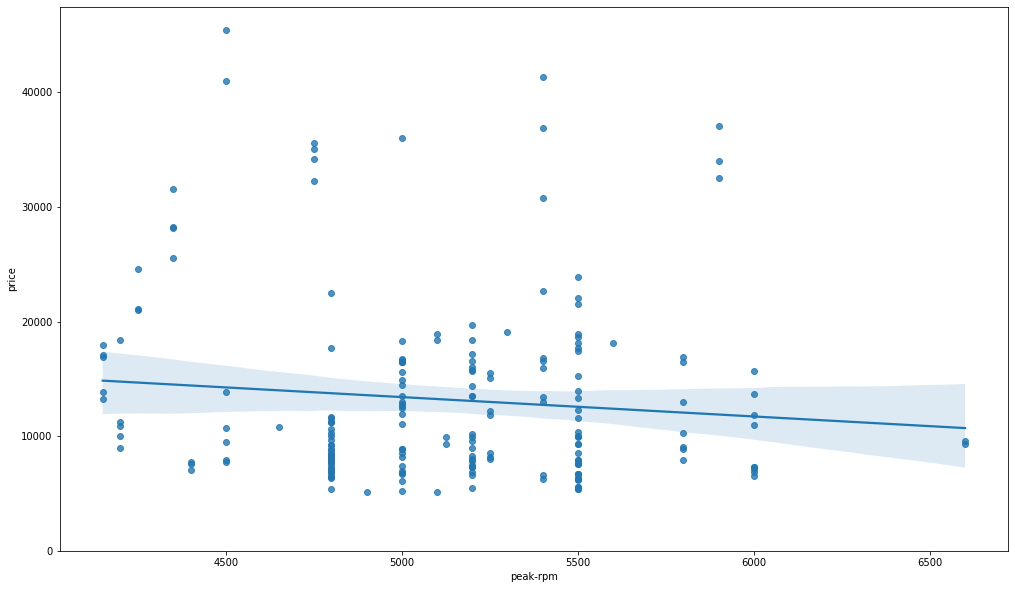

In [25]:
# Nuevamente se crea una Regression Plot, ahora cambiando la variable de entrada a peak-rpm

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [26]:
# Se aplica correlación entre las variables, donde se confirma que highway-mpg está más correlacionada que 
# peak-rpm al momento de tratar de predecir el precio

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


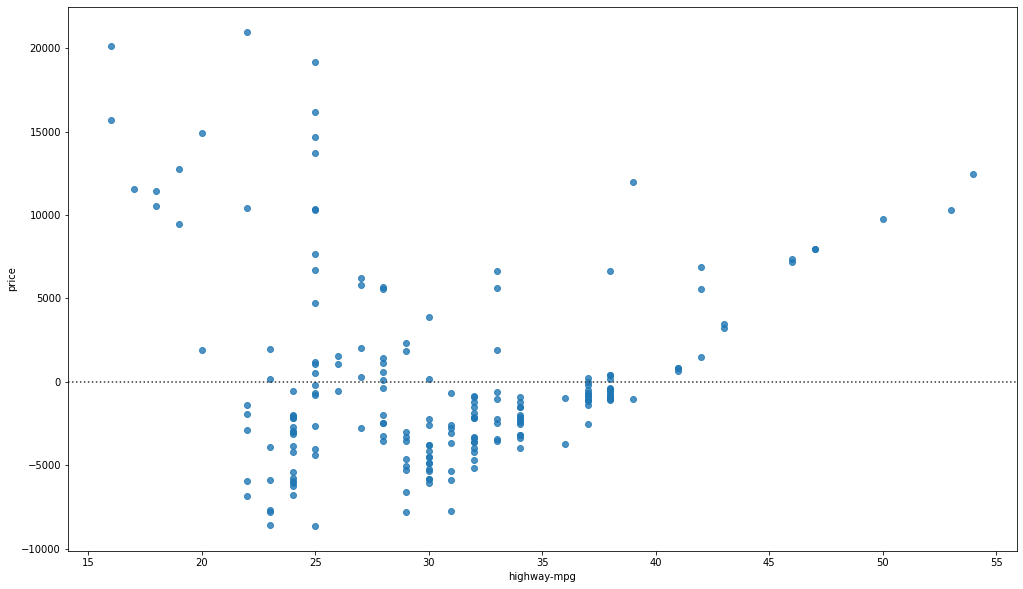

In [27]:
# Ahora pasaremos a crear un Residual Plot, la idea es tener una gráfica con los puntos suficientemente al azar
# lo que nos da como conclusión que un modelo de regresión lineal es adecuado; en esta gráfica vemos que no 
# ocurre, hay cierta tendencia en la parte media de la gráfica, entonces RL no es lo adecuado en este problema

width = 17
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1091/1374838976.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1091/1374838976.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

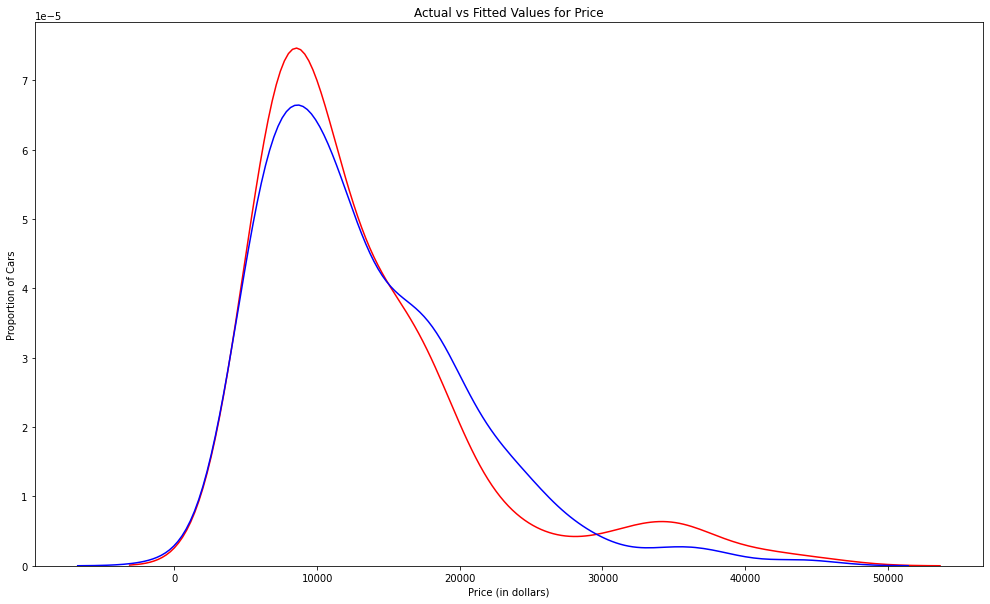

In [32]:
# Ahora utilizaremos una Distribution Plot para visualizar mejor las regresiones lineales múltiples
# Aquí podremos ver visualmente qué tanto se acercan los valores predichos a los valores reales 

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [33]:
# En este ejercicio, haremos uso de una regresión polinomial a ver si se ajusta mejor al valor de precio
# Aquí definiremos la función para sacar la gráfica de visualización

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
# Aquí se definen nuevamente las variables a relacionar y se hace uso de la función polyfit

x = df['highway-mpg']
y = df['price']

# Aquí se indica hacer una regresión de grado 3 e imprimimos los valores de los coeficientes

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


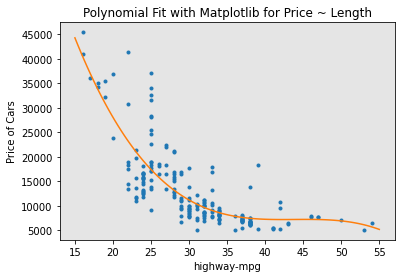

In [43]:
# Aquí graficamos la función cuadrática y se compara vs los valores reales 

PlotPolly(p, x, y, 'highway-mpg')

In [47]:
# También se pueden hacer regresiones polinomiales a partir de varias variables de entrada

pr=PolynomialFeatures(degree=2)

Z_pr=pr.fit_transform(Z)
Z.shape

Z_pr.shape

(201, 15)

In [50]:
# En estas líneas, se crea un pipe para primero normalizar la información, y después hacer una transformación

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
# Con este código, podemos normalizar la info, hacer la transformación e imprimir las predicciones al final 

Z = Z.astype(float)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [54]:
# Para este tipo de situaciones, es difícil ver visualmente si el modelo hace fit, por eso hacemos uso de 
# 2 métricas para evaluar, que en este caso son MSE y R2

lm.fit(X, Y)
# Find the R^2
print('R2 es: ', lm.score(X, Y))

R2 es:  0.4965911884339175


In [60]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
print('El MSE del precio y su valor predicho es: ', mse)

El MSE del precio y su valor predicho es:  31635042.944639895


In [62]:
# Hacemos lo mismo para un ejemplo de regresión múltiple

lm.fit(Z, df['price'])
# Find the R^2
print('R2 es: ', lm.score(Z, df['price']))

R2 es:  0.8093562806577458


In [63]:
#Hacemos ahora el cálculo de MSE y comparamos con el anterior

Y_predict_multifit = lm.predict(Z)
print('El MSE del precio y valor predicho es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El MSE del precio y valor predicho es:  11980366.870726489


In [69]:
# Calculamos R2 y MSE para el ejemplo polinomial

r_squared = r2_score(y, p(x))
print('R2 es: ', r_squared)

print("El MSE es",mean_squared_error(df['price'], p(x)))

R2 es:  0.6741946663906517
El MSE es 20474146.42636122


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


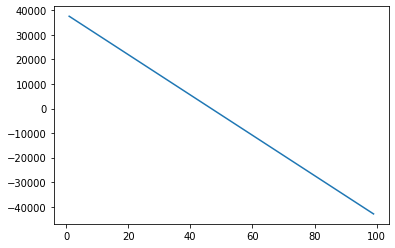

In [72]:
# Finalmente vamos con el tema de Predicción y Toma de decisiones, donde creamos un nuevo 

new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()

**Parte 2: Graded Review Questions**

Se anexa screenshot de la realización del Graded Review Questions para el Módulo 4 del curso Data Analysis with Python

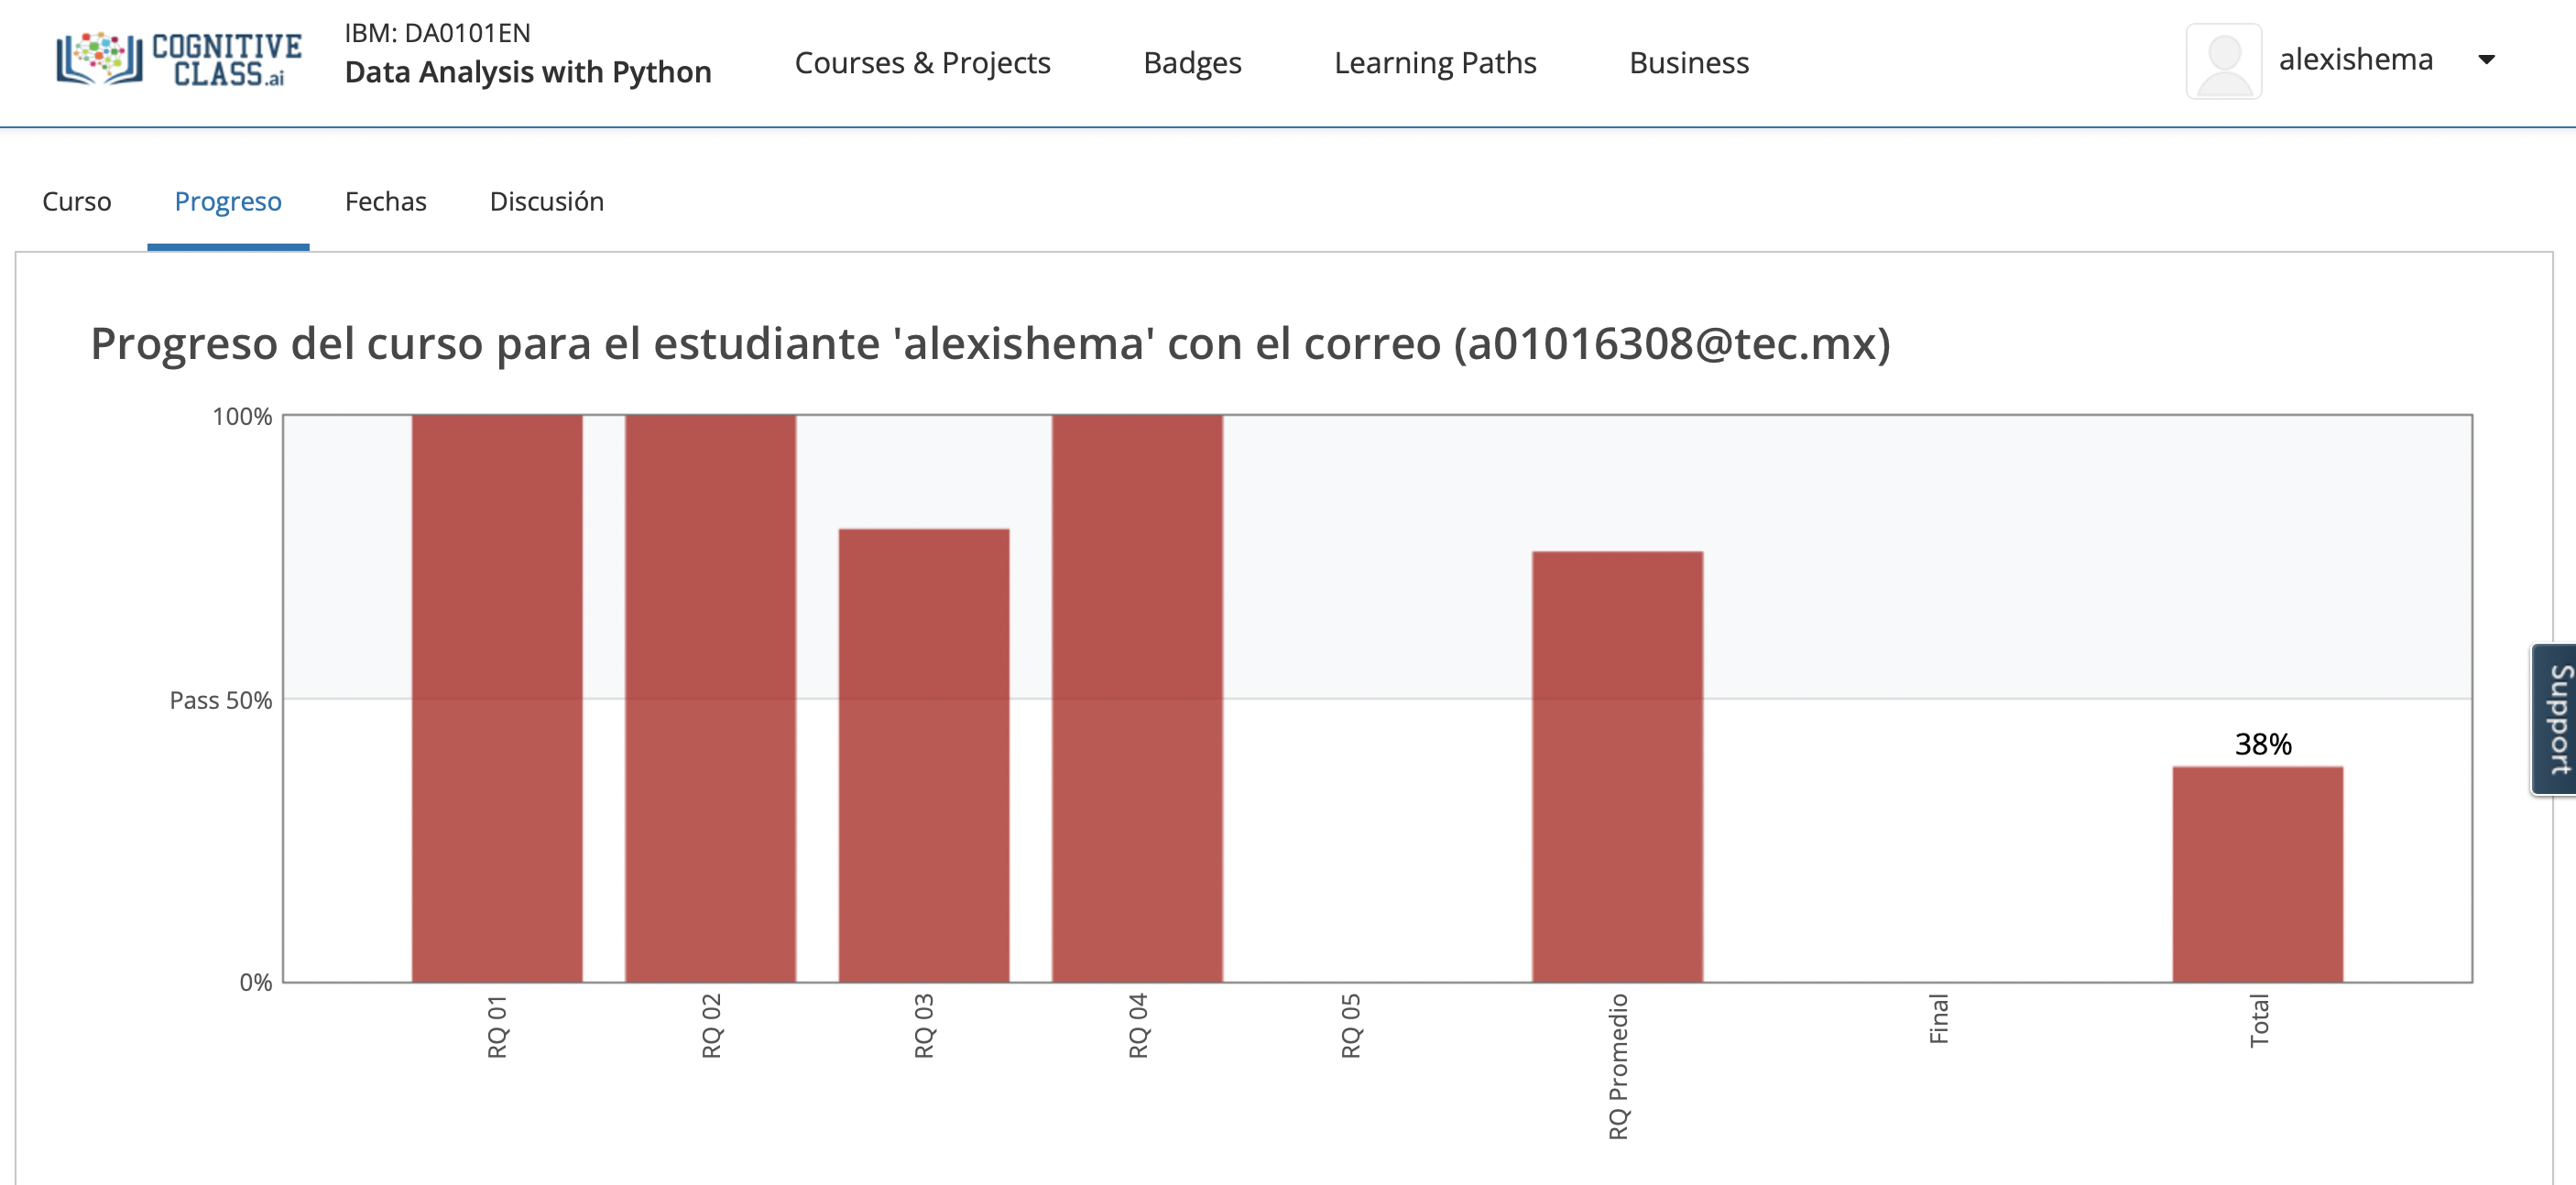